In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
sns.set_theme(style="darkgrid")
figsize(10, 6)
pd.set_option('display.max_colwidth', -1)


/var/folders/0t/rs4xlk9945xdd3cxy6yc9j340000gq/T/ipykernel_10754/3913289642.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [13]:
def get_indexes(raw):
   if( not pd.isna(raw)):
      highlights = re.findall(r'\d+:', raw)
      return list(map(lambda x: int(x.replace(':', '')) - 1, highlights))

In [14]:
data = pd.read_csv('survey_responses.csv')
data = data.drop(['StartDate', 'ResponseId', 'EndDate', 'IPAddress', 'Progress', 'Duration (in seconds)', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'Q_RecaptchaScore', 'UserLanguage'], axis=1)[data['Finished'] == 'True']
data['highlight_hp_high_1'] = data['highlight_hp_high_1'].map(get_indexes)
data['highlight_hp_high_2'] = data['highlight_hp_high_2'].map(get_indexes)
data['highlight_hp_low_1'] = data['highlight_hp_low_1'].map(get_indexes)
data['highlight_hp_low_2'] = data['highlight_hp_low_2'].map(get_indexes)
data['highlight_hero_high_1'] = data['highlight_hero_high_1'].map(get_indexes)
data['highlight_hero_high_2'] = data['highlight_hero_high_2'].map(get_indexes)
data['highlight_hero_low_1'] = data['highlight_hero_low_1'].map(get_indexes)
data['highlight_hero_low_2'] = data['highlight_hero_low_2'].map(get_indexes)
data.head()

,Status,Finished,RecordedDate,genre,hours_read,read_harry_potter,read_hero_academia,aphantasia_check,highlight_hp_high_1,highlight_hp_high_2,...,highlight_hero_low_2,rate_hero_low_1,rate_hero_low_2,rate_hero_low_3,rate_hero_low_4,rate_hero_low_5,Q61,Q62,Q63,Random ID
2,Survey Preview,True,2022-04-09 18:05:25,sci-fi,2-4 hours,Yes,No,3,"[2, 3, 10, 21, 33, 34]",[28],...,[10],Slightly agree,Slightly agree,Neutral,Slightly disagree,Slightly disagree,somewhat,yes,NaN,2718156370
3,IP Address,True,2022-04-11 14:12:22,Sci-fi short stories,0-1 hours,Yes,No,5,"[1, 13, 21, 23, 33]","[28, 34]",...,"[2, 7, 13]",Slightly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,No,yes,Allow for sub-sentence highlighitng,1170260771


In [ ]:
hp_high_sentences = list(open('hp_high.txt', 'r').read().split('\n'))
hp_low_sentences = list(open('hp_low.txt', 'r').read().split('\n'))
hero_high_sentences = list(open('hero_high.txt', 'r').read().split('\n'))
hero_low_sentences = list(open('hero_low.txt', 'r').read().split('\n'))

In [15]:
def group_highlights(sent, highlights):
   highlight_array = np.zeros(len(sent) + 1)
   for x in highlights:
      highlight_array[x] += 1
   return highlight_array

In [26]:
def get_highlight_text(sent, bool_array):
   return [sent[i] for i in np.where(bool_array)[0]]

In [33]:
def show_highlight_results(storyName, incOrDec, sentences):
   column = f"highlight_{storyName}_{incOrDec}"
   x = np.linspace(0, 35, 36)
   y = group_highlights(sentences, data[column])
   print(len(y), len(x))
   plt.scatter(x, y)
   plt.xlabel("Sentences")
   plt.ylabel("Highlight Count")
   plt.title(f"{'Positive' if(incOrDec == 1) else 'Negative'} Highlights for {storyName}")

   plt.show()
   return ( get_highlight_text(sentences, y), y)

36 36


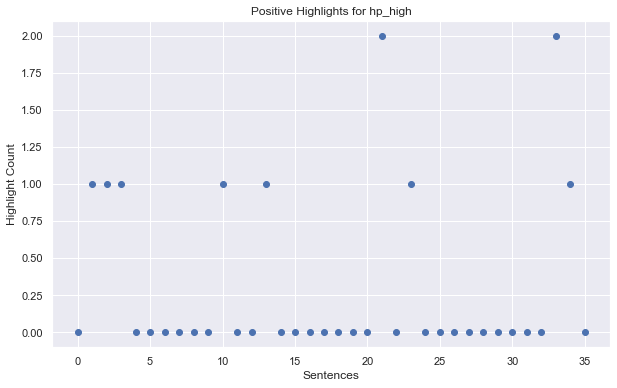

['The Veil, that is.', 'The one that Sirius had fallen behind.', "The last time he'd dreamed about the Department of Mysteries, Sirius had died.", 'But then, so were so many other people, good people, who should not have died.', "Hell, even Crabbe didn't deserve to die then.", 'He was lying on a floor, covered by a poor excuse for a blanket, and someone appeared to be attempting to break the door down.', 'Dudley? Where had the Veil sent him?', 'SMASH! The door flew clean off its hinges and landed on the floor with a thunderous crash.', 'Hagrid stood in the doorway, looking very impressive.'] [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0.]


In [36]:
sentences, counts = show_highlight_results('hp_high', 1, hp_high_sentences)
print(sentences, counts)

In [4]:
questions = pd.read_csv('survey_responses.csv')[0:1]

In [5]:
scale_questions = ['emotional_affect', 'forgetting_surroundings', 'distracted', 'characters_alive', 'mental_imagery']